## Identifying Pneumonia with TensorFlow

Given *images of chest x rays for normal and penumonic patients*, we need to predict if a given chest x ray is penumonic or normal (two classes).

We will use TensorFlow and Convolutional Neural Networks (CNN) to make our predictions.

Data source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

In [4]:
img_height = 128
img_width = 128
batch_size = 32

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


2025-05-08 08:24:38.722305: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

2025-05-08 08:30:12.990954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]
2025-05-08 08:30:12.991973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]


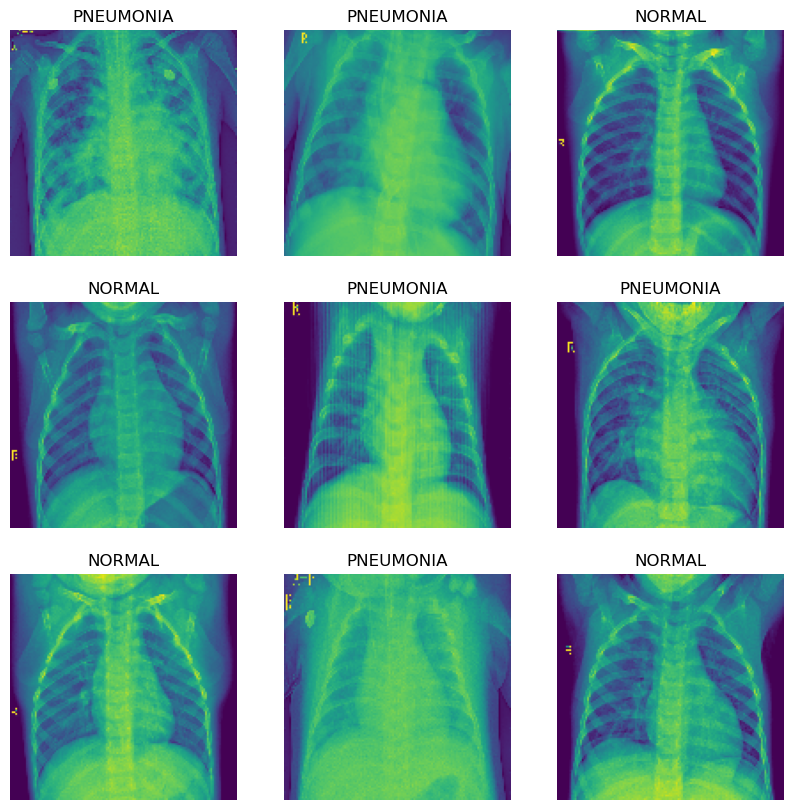

In [7]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
epochs = 10
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10


2025-05-08 08:42:36.577772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5216]
	 [[{{node Placeholder/_4}}]]
2025-05-08 08:42:36.578178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]
/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_lo

163/163 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9095  

2025-05-08 08:43:43.008701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16]
	 [[{{node Placeholder/_4}}]]
2025-05-08 08:43:43.009077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16]
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 67s 396ms/step - loss: 0.2192 - accuracy: 0.9095 - val_loss: 0.4859 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 52s 318ms/step - loss: 0.1163 - accuracy: 0.9592 - val_loss: 0.3513 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 51s 315ms/step - loss: 0.0999 - accuracy: 0.9670 - val_loss: 0.4436 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 52s 317ms/step - loss: 0.0811 - accuracy: 0.9712 - val_loss: 0.3258 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 52s 320ms/step - loss: 0.0631 - accuracy: 0.9780 - val_loss: 0.3336 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 51s 312ms/step - loss: 0.0587 - accuracy: 0.9803 - val_loss: 0.3732 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 51s 314ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.1596 - val_accuracy: 0.9

In [13]:
model.evaluate(test_ds)

2025-05-08 09:36:31.674737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [624]
	 [[{{node Placeholder/_0}}]]
2025-05-08 09:36:31.675124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [624]
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 154ms/step - loss: 1.7830 - accuracy: 0.7772


[1.7830077409744263, 0.7772436141967773]